## Moss layer photosynthesis, respiration and net carbon balance

### Explore:
### 1. *pyAPES.bottomlayer.carbon* functions
### 2. dataset from Williams & Flanagan, 1996. Oecologia


In [1]:
# setting path
import sys
#sys.path.append('c:\\Repositories\\pyAPES_main')
import os
from dotenv import load_dotenv

load_dotenv()
pyAPES_main_folder = os.getenv('pyAPES_main_folder')

sys.path.append(pyAPES_main_folder)
#print(sys.path)

In [2]:
# import moss carbon module
import pyAPES.bottomlayer.carbon as mc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# typical Sphagnum -traits (Launiainen et al., 2023. GMD, in prep)

Sphagnum = {
    'name': 'Sphagnum sp.',
    'layer_type': 'bryophyte',
    'coverage': 0.0, # Note - now no sphagnum!
    'height': 0.06,  # range: [0.044, 0.076]
    'roughness_height': 0.02, # [m]
    'bulk_density': 35.1,  # [kg m-3], range: [9.28, 46.7]
    'max_water_content': 17.8,  # [g g-1 DM], range: [15.6, 24.4]
    'water_content_ratio': 0.43,  # max_symplast_water_content:max_water_content -ratio
    'min_water_content': 0.1, # [g g-1 DM]
    'porosity': 0.98, # macroporosity [-]

    'photosynthesis': {
        'Vcmax': 45.0, 'Jmax': 85.5, 'Rd': 1.35, # [umol m-2 (ground) s-1] at 25 degC
        'alpha': 0.3, 'theta': 0.8, 'beta': 0.9, # quantum yield, curvature, co-limitation
        'gref': 0.04, 'wref': 7.65, 'a0': 0.7, 'a1': -0.263, 'CAP_desic': [0.58, 10.0],
        'tresp': { # temperature response 
                'Vcmax': [78., 200., 649.], # [activation energy, deactivation energy, entropy factor [kJ mol-1]]
                'Jmax': [56., 200., 646.],
                'Rd': [33.0]
                },
    },
    'optical_properties': { # moisture responses are hard-coded
        'emissivity': 0.98,
        'albedo': {'PAR': 0.10, 'NIR': 0.27} # albedos when fully hydrated [-]
    },
    'water_retention': {
        'theta_s': 0.62,  # 1e-3*max_water_content * bulk_density
        'theta_r': 0.26,  # 1e-3*water_content_ratio * max_water_content * bulk_density
        'alpha': 0.381,  # air-entry potential [cm-1] 
        'n': 1.781,  # pore-size distribution [-]
        'saturated_conductivity': 3.4e-4,  # [m s-1]
        'pore_connectivity': -2.1  # [-]
    },
    'initial_conditions': {
        'temperature': 10.0, # degC
        'water_content': 20.0 # g g-1 DM
    }
}

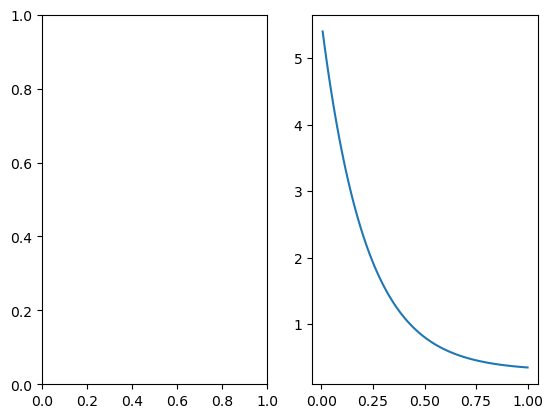

In [8]:
# create array of water contents [g g-1 DM]

w = np.linspace(Sphagnum['min_water_content'], Sphagnum['max_water_content'], 100)
wmax = Sphagnum['max_water_content']

cond_para = {'gref': 0.04, 'wref': 7.65, 'a0': 0.7, 'a1': -0.263}
desic_para = {'CAP_desic': [0.58, 10.0]}
gc = mc.conductance(cond_para, w) 

cap = mc.relative_capacity(desic_para, w)

# figure
fig, ax = plt.subplots(1,2)

ax[0].plot(w/wmax)
ax[1].plot(w/wmax, gc/cond_para['gref'])